# Demonstration of McStasScript
This file demonstrates how McStasScript can be used to run McStas from a python environment in a userfreindly manner.

In [1]:
import sys
# Path to McStasScript pythoon file
sys.path.append('/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript')

from mcstasscript.interface import instr, plotter, functions

# Creating the instance of the class, insert path to mcrun and to mcstas root directory
Instr = instr.McStas_instr("jupyter_demo")

In [2]:
Instr.show_components() # Shows available McStas component categories in current installation

Here are the available component categories:
 sources
 optics
 samples
 monitors
 misc
 contrib
 union
 obsolete
Call show_components(category_name) to display


In [3]:
Instr.show_components("sources") # Display all McStas source components 

Here are all components in the sources category.
 Adapt_check     Monitor_Optimizer   Source_div      Virtual_output
 ESS_butterfly   Source_Maxwell_3    Source_gen      
 ESS_moderator   Source_Optimizer    Source_simple   
 Moderator       Source_adapt        Virtual_input   


In [4]:
Instr.component_help("Source_simple") # Displays help on the Source_simple component

 ___ Help Source_simple _____________________________________________________________________
|optional parameter|required parameter|default value|user specified value|
radius = 0.1 [m] // Radius of circle in (x,y,0) plane where neutrons are generated.
yheight = 0.0 [m] // Height of rectangle in (x,y,0) plane where neutrons are generated.
xwidth = 0.0 [m] // Width of rectangle in (x,y,0) plane where neutrons are generated.
dist = 0.0 [m] // Distance to target along z axis.
focus_xw = 0.045 [m] // Width of target
focus_yh = 0.12 [m] // Height of target
E0 = 0.0 [meV] // Mean energy of neutrons.
dE = 0.0 [meV] // Energy half spread of neutrons (flat or gaussian sigma).
lambda0 = 0.0 [AA] // Mean wavelength of neutrons.
dlambda = 0.0 [AA] // Wavelength half spread of neutrons.
flux = 1.0 [1/(s*cm**2*st*energy unit)] // flux per energy unit, Angs or meV if flux=0, 
                                           the source emits 1 in 4*PI whole space. 
gauss = 0.0 [1] // Gaussian (1) or Flat (0

In [5]:
source = Instr.add_component("Source","Source_simple") # Adds an instance of Source_simple

In [6]:
# Lets add a parameter to the instrument to control the wavelength of the source
Instr.add_parameter("double", "wavelength", value=3,
                    comment="[AA] Wavelength emmited from source")
source.xwidth = 0.06; source.yheight = 0.08;
source.dist = 2; source.focus_xw = 0.05; source.focus_yh = 0.05
source.lambda0 = "wavelength"; source.dlambda = 0.05; source.flux = 1E8

In [7]:
source.print_long() # Verify that the information is correct

COMPONENT Source = Source_simple
  yheight = 0.08 [m]
  xwidth = 0.06 [m]
  dist = 2 [m]
  focus_xw = 0.05 [m]
  focus_yh = 0.05 [m]
  lambda0 = wavelength [AA]
  dlambda = 0.05 [AA]
  flux = 100000000.0 [1/(s*cm**2*st*energy unit)]
AT [0, 0, 0] ABSOLUTE
ROTATED [0, 0, 0] ABSOLUTE


In [8]:
guide = Instr.add_component("Guide", "Guide_gravity", AT=[0,0,2], RELATIVE="Source")
guide.set_comment="Beam extraction and first guide piece"

In [9]:
guide.show_parameters() # Lets view the parameters available in our guide component

 ___ Help Guide_gravity _____________________________________________________________________
|optional parameter|required parameter|default value|user specified value|
w1 [m] // Width at the guide entry
h1 [m] // Height at the guide entry
w2 = 0.0 [m] // Width at the guide exit. If 0, use w1.
h2 = 0.0 [m] // Height at the guide exit. If 0, use h1.
l [m] // length of guide
R0 = 0.995 [1] // Low-angle reflectivity
Qc = 0.0218 [AA-1] // Critical scattering vector
alpha = 4.38 [AA] // Slope of reflectivity
m = 1.0 [1] // m-value of material. Zero means completely absorbing. m=0.65  glass/SiO2 
               Si   Ni  Ni58  supermirror Be    Diamond m=  0.65       0.47 1   1.18  2-6   
                     1.01  1.12 for glass/SiO2, m=1 for Ni, 1.2 for Ni58, m=2-6 for 
               supermirror. m=0.47 for Si 
W = 0.003 [AA-1] // Width of supermirror cut-off
nslit = 1.0 [1] // Number of vertical channels in the guide (>= 1) (nslit-1 vertical 
                   dividing walls). 
d = 0.000

In [10]:
guide.set_parameters({"w1" : 0.05, "w2" : 0.05, "h1" : 0.05, "h2" : 0.05,
                      "l" : 8, "m" : 3.5, "G" : -9.2})

In [11]:
guide.print_long() # Verify the information on this component is correct

COMPONENT Guide = Guide_gravity
  w1 = 0.05 [m]
  h1 = 0.05 [m]
  w2 = 0.05 [m]
  h2 = 0.05 [m]
  l = 8 [m]
  m = 3.5 [1]
  G = -9.2 [m/s2]
AT [0, 0, 2] RELATIVE Source
ROTATED [0, 0, 0] RELATIVE Source


In [12]:
# Add a sample to the instrument
sample = Instr.add_component("sample", "PowderN", AT=[0, 0, 9], RELATIVE="Guide") 

In [13]:
# Set parameters corresponding to a copper cylinder
sample.radius = 0.015; sample.yheight = 0.05; sample.reflections = "\"Cu.laz\""

In [14]:
Instr.show_components("monitors") # Monitors are needed to record information

Here are all components in the monitors category.
 Brilliance_monitor      Monitor           PSD_monitor_psf_eff   TOF2E_monitor
 DivLambda_monitor       Monitor_4PI       PSDcyl_monitor        TOF2Q_cylPSD_monitor
 DivPos_monitor          Monitor_Sqw       PSDlin_diff_monitor   TOFLambda_monitor
 Divergence_monitor      Monitor_nD        PSDlin_monitor        TOF_PSD_monitor_rad
 EPSD_monitor            PSD_TOF_monitor   PolLambda_monitor     TOF_cylPSD_monitor
 E_monitor               PSD_monitor       Pol_monitor           TOF_monitor
 Hdiv_monitor            PSD_monitor_4PI   PreMonitor_nD         TOFlog_monitor
 L_monitor               PSD_monitor_TOF   Res_monitor           
 MeanPolLambda_monitor   PSD_monitor_psf   Sqq_w_monitor         


In [15]:
# Add 4PI detector to detect all neutrons
sphere = Instr.add_component("PSD_4PI", "PSD_monitor_4PI", RELATIVE="sample")

In [16]:
sphere.nx = 300; sphere.ny = 300
sphere.radius = 1; sphere.restore_neutron = 1
sphere.filename = "\"PSD_4PI.dat\"" # filenames need printed quotes, use \"
sphere.print_long() # Verify that monitors have filenames that are strings when printed

COMPONENT PSD_4PI = PSD_monitor_4PI
  nx = 300 [1]
  ny = 300 [1]
  filename = "PSD_4PI.dat" [string]
  radius = 1 [m]
  restore_neutron = 1 [1]
AT [0, 0, 0] RELATIVE sample
ROTATED [0, 0, 0] RELATIVE sample


In [17]:
# Add PSD monitor to see the direct beam after the sample
PSD = Instr.add_component("PSD", "PSD_monitor", AT=[0,0,1], RELATIVE="sample") 
PSD.xwidth = 0.1; PSD.yheight = 0.1; PSD.nx = 200; PSD.ny = 200
PSD.filename = "\"PSD.dat\""; PSD.restore_neutron = 1

In [18]:
L_mon = Instr.add_component("L_mon", "L_monitor", RELATIVE="PSD")

In [19]:
# Since the wavelength is an instrument parameter, it can be used when setting parameters
L_mon.Lmin = "wavelength - 0.1"; L_mon.Lmax = "wavelength + 0.1"; L_mon.nL = 150
L_mon.xwidth = 0.1; L_mon.yheight = 0.1
L_mon.filename = "\"wave.dat\""; L_mon.restore_neutron = 1
L_mon.comment = "Wavelength monitor for narrow range"

In [20]:
L_mon.print_long()

// Wavelength monitor for narrow range
COMPONENT L_mon = L_monitor
  nL = 150 [1]
  filename = "wave.dat" [string]
  xwidth = 0.1 [m]
  yheight = 0.1 [m]
  Lmin = wavelength - 0.1 [AA]
  Lmax = wavelength + 0.1 [AA]
  restore_neutron = 1 [1]
AT [0, 0, 0] RELATIVE PSD
ROTATED [0, 0, 0] RELATIVE PSD


In [21]:
Instr.print_components() # Lets get an overview of the instrument so far

Source  Source_simple   AT (0, 0, 0) ABSOLUTE        ROTATED (0, 0, 0) ABSOLUTE
Guide   Guide_gravity   AT (0, 0, 2) RELATIVE Source ROTATED (0, 0, 0) RELATIVE Source
sample  PowderN         AT (0, 0, 9) RELATIVE Guide  ROTATED (0, 0, 0) RELATIVE Guide
PSD_4PI PSD_monitor_4PI AT (0, 0, 0) RELATIVE sample ROTATED (0, 0, 0) RELATIVE sample
PSD     PSD_monitor     AT (0, 0, 1) RELATIVE sample ROTATED (0, 0, 0) RELATIVE sample
L_mon   L_monitor       AT (0, 0, 0) RELATIVE PSD    ROTATED (0, 0, 0) RELATIVE PSD


In [22]:
Instr.show_parameters()

double  wavelength  =  3  // Wavelength emmited from source


# Running the McStas instrument
Now we have assembled an instrument and it is time to perform a simulation

In [23]:
# With increment_folder_name enabled, a new folder with incremented number is created
data = Instr.run_full_instrument(foldername="jupyter_demo",
                                 parameters={"wavelength" : 1.5},
                                 mpi=4, ncount=2E7,
                                 increment_folder_name = True)

INFO: Using directory: "jupyter_demo_12"
INFO: Regenerating c-file: jupyter_demo.c
CFLAGS=
INFO: Recompiling: ./jupyter_demo.out
INFO: ===
         (negative time, miss next components, rounding errors, Nan, Inf).
         (negative time, miss next components, rounding errors, Nan, Inf).
         (negative time, miss next components, rounding errors, Nan, Inf).
         (negative time, miss next components, rounding errors, Nan, Inf).
INFO: Placing instr file copy jupyter_demo.instr in dataset jupyter_demo_12

Simulation 'jupyter_demo' (jupyter_demo.instr): running on 4 nodes (master is 'CI0020872', MPI version 2.1).
Opening input file '/Applications/McStas-2.5.app/Contents/Resources/mcstas/2.5/tools/Python/mcrun/../mccodelib/../../../data/Cu.laz' (Table_Read_Offset)
Table from file 'Cu.laz' (block 1) is 19 x 18 (x=1:6), constant step. interpolation: linear
  '# TITLE *-Cu-[FM3-M] Otte, H.M.[1961];# CELL 3.615050 3.615050 3.615050 90. ...'
PowderN: sample: Reading 19 rows from Cu.laz
P

## Working with the returned data
The returned data object is a list of McStasData objects, each containing the results from a monitor.
These data objects also contain preferences for how they should be plotted if this is done automatically.

In [24]:
wavelength_data = functions.name_search("L_mon", data)
wavelength_intensity = wavelength_data.Intensity
wavelength_xaxis = wavelength_data.xaxis

for index in range(70,75):
    print([wavelength_xaxis[index], wavelength_intensity[index]])

[1.494, 470.3132617]
[1.495333333, 472.9846513]
[1.496666667, 481.5639576]
[1.498, 474.1251374]
[1.499333333, 475.2808707]


## Plotting the returned data
The plot options looks at some metadata in the McStasData for plotting preferences. For this reason these options can be adjusted for individual data files instead of complex syntax for the plotting command.

number of elements in data list = 3
Plotting data with name PSD_4PI
Plotting data with name PSD
Plotting data with name L_mon


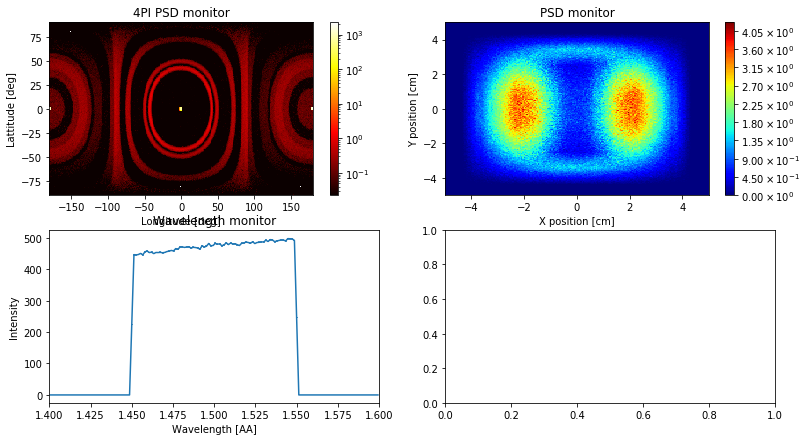

In [25]:
# Adjusting PSD_4PI plot
functions.name_plot_options("PSD_4PI", data, log=1, colormap="hot", orders_of_mag=5)

plot = plotter.make_sub_plot(data) # Making subplot of our monitors